### Dataset and Project Question
For our research project, we have selected datasets containing processed angiography data on patients in various clinics in 1988, applying a probability model derived from test results of 303 patients at the Cleveland Clinic in Cleveland, Ohio to generate and estimate results for the diagnosis of coronary heart disease (Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R., 1989). The datasets include the following patients undergoing angiography: 
- 303 patients at the Cleveland Clinic in Cleveland, Ohio (Original dataset for model) 
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from the University Hospitals in Zurich and Basel, Switzerland

These datasets were retrieved from the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset from UCI machine learning repository, and converted from .data files to CSV files with Excel. The dataset obtained contains the following 14 attributes out of 76 attributes from the initial dataset for each patient: 

In [1]:
myTable <- data.frame(
  Variable = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
  Definition = c("Age", "Sex", "Chest pain type", "Resting blood pressure on admission to hospital", "Serum cholesterol", "Presence of high blood sugar", "Resting electrocardiographic results", "Maximum heart rate achieved", "Exercise induced angina", "ST depression induced by exercise relative to rest", "Slope of the peak exercise ST segment", "Number of major vessels coloured by fluoroscopy", "Presence of defect", "Diagnosis of heart disease"),
  Type = c("Continuous", "Categorical", "Categorical", "Continuous", "Continuous", "Categorical", "Categorical", "Continuous", "Categorical", "Continuous", "Categorical", "Continuous", "Categorical", "Categorical"),
  Unit = c("Years", "N/A", "N/A", "mmHg", "mg/dl", "N/A", "N/A", "BPM", "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"),
  Categories = c("N/A", "0: Female; 1: Male", "1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic", "N/A", "N/A", "0: False; 1: True", "0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria", "N/A", "0: No; 1: Yes", "N/A", "1: Upsloping; 2: Flat; 3: Downsloping", "Range from 1-3", "3: Normal; 6: Fixed defect; 7: Reversable defect", "0: < 50% diameter narrowing; 1+: > 50% diameter narrowing")
)
myTable

Variable Definition                                         Type       
1  age      Age                                                Continuous 
2  sex      Sex                                                Categorical
3  cp       Chest pain type                                    Categorical
4  trestbps Resting blood pressure on admission to hospital    Continuous 
5  chol     Serum cholesterol                                  Continuous 
6  fbs      Presence of high blood sugar                       Categorical
7  restecg  Resting electrocardiographic results               Categorical
8  thalach  Maximum heart rate achieved                        Continuous 
9  exang    Exercise induced angina                            Categorical
10 oldpeak  ST depression induced by exercise relative to rest Continuous 
11 slope    Slope of the peak exercise ST segment              Categorical
12 ca       Number of major vessels coloured by fluoroscopy    Continuous 
13 thal     Presence of defect                                 Categorical
14 num      Diagnosis of heart disease                         Categorical
   Unit 
1  Years
2  N/A  
3  N/A  
4  mmHg 
5  mg/dl
6  N/A  
7  N/A  
8  BPM  
9  N/A  
10 N/A  
11 N/A  
12 N/A  
13 N/A  
14 N/A  
   Categories                                                                                                                                                                                    
1  N/A                                                                                                                                                                                           
2  0: Female; 1: Male                                                                                                                                                                            
3  1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic                                                                                                                   
4  N/A                                                                                                                                                                                           
5  N/A                                                                                                                                                                                           
6  0: False; 1: True                                                                                                                                                                             
7  0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8  N/A                                                                                                                                                                                           
9  0: No; 1: Yes                                                                                                                                                                                 
10 N/A                                                                                                                                                                                           
11 1: Upsloping; 2: Flat; 3: Downsloping                                                                                                                                                         
12 Range from 1-3                                                                                                                                                                                
13 3: Normal; 6: Fixed defect; 7: Reversable defect                                                                                                                                              
14 0: < 50% diameter narrow

My project question is: 
#### "Given the sample data for angiography patients, is cholesterol level associated with age, and does the association differ between different locations?" 

Previous studies have indicated a positive association between cholesterol level and age, where total cholesterol levels steadily increase from age 20 to 65, followed by a slight decrease in men and a plateu in women (Beckett, N., Nunes, M., & Bulpitt, C., 2000). Another study has indicated a positive correlation between serum cholesterol and heart rate, along with a significant inverse association between heart rate and HDL-cholesterol levels (Wannamethee, G., & Shaper, A. G., 1994). A study in the US has also identified a low-order, positive relationship of dietary cholesterol intake to systolic blood pressure (Sakurai, M., Stamler, J., Miura, K., Brown, I. J., Nakagawa, H., Elliott, P., Ueshima, H., Chan, Q., Tzoulaki, I., Dyer, A. R., Okayama, A., Zhao, L., & INTERMAP Research Group, 2011). As such, gender, heart rate and blood pressure may be confounding variables for this question. However, it is unclear how the locations of each clinic influence the change in cholesterol levels with age.

There are 4 separate datasets dependent on location, and thus can be modified to contain a new variable `location` indicating their respective location. However, the `chol` column for the Switzerland dataset does not contain any valid values, and thus the Switzerland dataset may need to be excluded. A multiple linear regression model can be applied with the `location`, `age`, and `chol` variables, allowing a prediction on the difference in association between cholesterol level and age between different locations. A/B testing can also be applied to compare the effect of variation in location on the required association.

Given the project question and the limitations of the given data, the following hypothesis test is to be conducted: 
- $H_0: \text{There is no significant difference in the association of cholesterol level with age between each location}$ 
- $H_1: \text{There is a significant difference in the association of cholesterol level with age between at least 1 pair of locations}$

<!-- Given the project question, let $\beta_{5}$ be the difference in reference line slope for Hungary compared to the reference line slope for Cleveland, and let $\beta_{6}$ be the difference in slope for the reference line for California compared to the reference line slope for Cleveland. The following hypothesis tests will be conducted: 

Hypothesis test 1:
- $H_0: \beta_{5} = 0$ 
- $H_1: \beta_{5} \neq 0$

Hypothesis test 2:
- $H_0: \beta_{6} = 0$ 
- $H_1: \beta_{6} \neq 0$ -->

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [2]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles
library(ggplot2) # Provides commands to create complex plots
library(GGally) # Provides correlation between variables
library(tidymodels) # Modelling with training and testing
library(car) # Applied regression tools, including VIF
library(leaps) # Exhaustive search for the best subsets of the variables in x for predicting y in linear regression
library(glmnet) # Regularised regression models
library(mltools) # Regression metrics


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────

### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merged into a single dataframe called `total_heart`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing clinics that the probability model was applied to; the reference level is set to "Cleveland", the clinic the model was derived from.
- The `age`, `sex`, `cp`, `trestbps`, `chol`, `thalach`, and `num` columns require a change in data type to be used as intended.
- Due to several datasets either missing most or all data for `fbs`, `oldpeak`, `slope`, `ca` and `thal` columns, the columns have been removed under the assumption that they are irrelevant.
- Any patients with "?" for any variables, `trestbps == 0` or `chol == 0` are assumed to be invalid and have been removed.
    - The Switzerland dataset has `chol == 0` for all data and as such has been removed.
- Any values of `num >= 1` provide the same result, and thus have been converted to 1.

In [3]:
Cleveland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Cleveland.csv") %>% 
    mutate(location = "Cleveland")
Hungary_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Hungarian.csv") %>% 
    mutate(location = "Hungary")
Switzerland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Switzerland.csv") %>% 
    mutate(location = "Switzerland")
California_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_VA.csv") %>% 
    mutate(location = "California")
total_heart <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num) %>% 
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | thalach == '?' | num == '?')) %>% 
    mutate(num = ifelse(num >= 1, 1, num))  %>% 
    transform(sex = as.character(as.factor(sex)), cp = as.character(as.factor(cp)), trestbps = as.double(as.factor(trestbps)), chol = as.double(as.factor(chol)), thalach = as.double(as.factor(thalach)), num = as.character(as.factor(num))) 
# %>% 
total_heart$location <- factor(total_heart$location) %>% 
    relevel(total_heart$location, ref = "Cleveland")

head(total_heart)
tail(total_heart)

location  age sex cp trestbps chol restecg thalach exang num
1 Cleveland 63  1   1  34        81  2       48      0     0  
2 Cleveland 67  1   4  43       134  2        6      1     1  
3 Cleveland 67  1   4  16        77  2       27      1     1  
4 Cleveland 37  1   3  25        98  0       84      0     0  
5 Cleveland 41  0   2  25        52  2       70      0     0  
6 Cleveland 56  1   2  16        84  0       76      0     0

location   age sex cp trestbps chol restecg thalach exang num
669 California 53  1   4  33       147  1        26     1     1  
670 California 62  1   4  42        21  1        36     1     1  
671 California 46  1   4  27       156  0        24     0     1  
672 California 54  0   4  22       173  1        52     0     1  
673 California 55  1   4  17        71  1         1     0     1  
674 California 62  1   2  16       102  2       103     1     1

_Table 1: Initial dataset for all required data_

In [4]:
table(total_heart$location, useNA = 'always')
table(total_heart$sex, useNA = 'always')
# max(total_heart$thalach)
# min(total_heart$thalach)


 Cleveland California    Hungary       <NA> 
       303        102        269          0 


   0    1 <NA> 
 175  499    0 

### 2.3. Exploratory Data Analysis

#### 2.3.1. Distribution of cholesterol levels
- Histograms have been selected to display the sampling distribution of cholesterol levels and ages in each location, to allow easier observation of spread and centre of data.
- The majority of the `chol` distributions are skewed to the left.
- The majority of the `age` distributions are skewed to the right.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


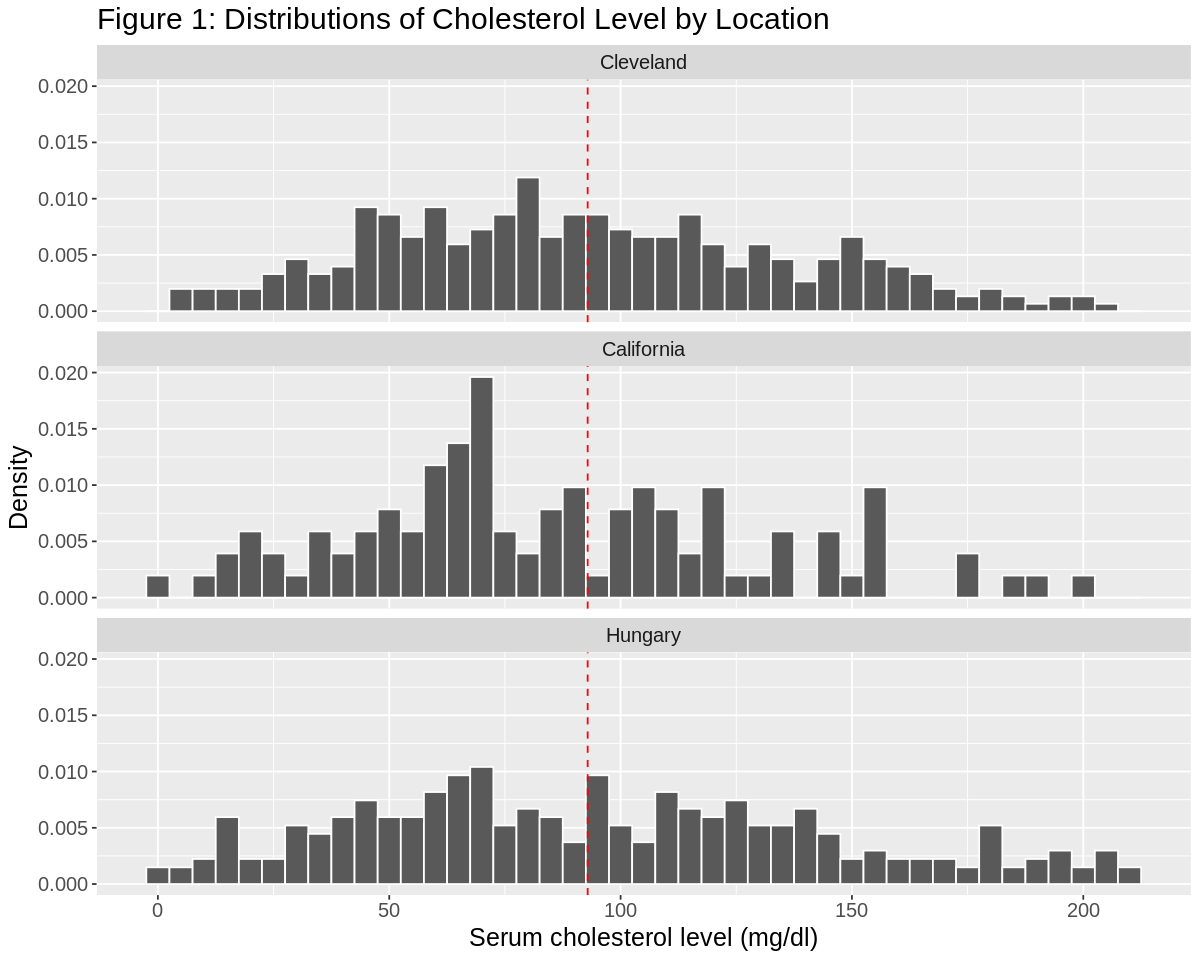

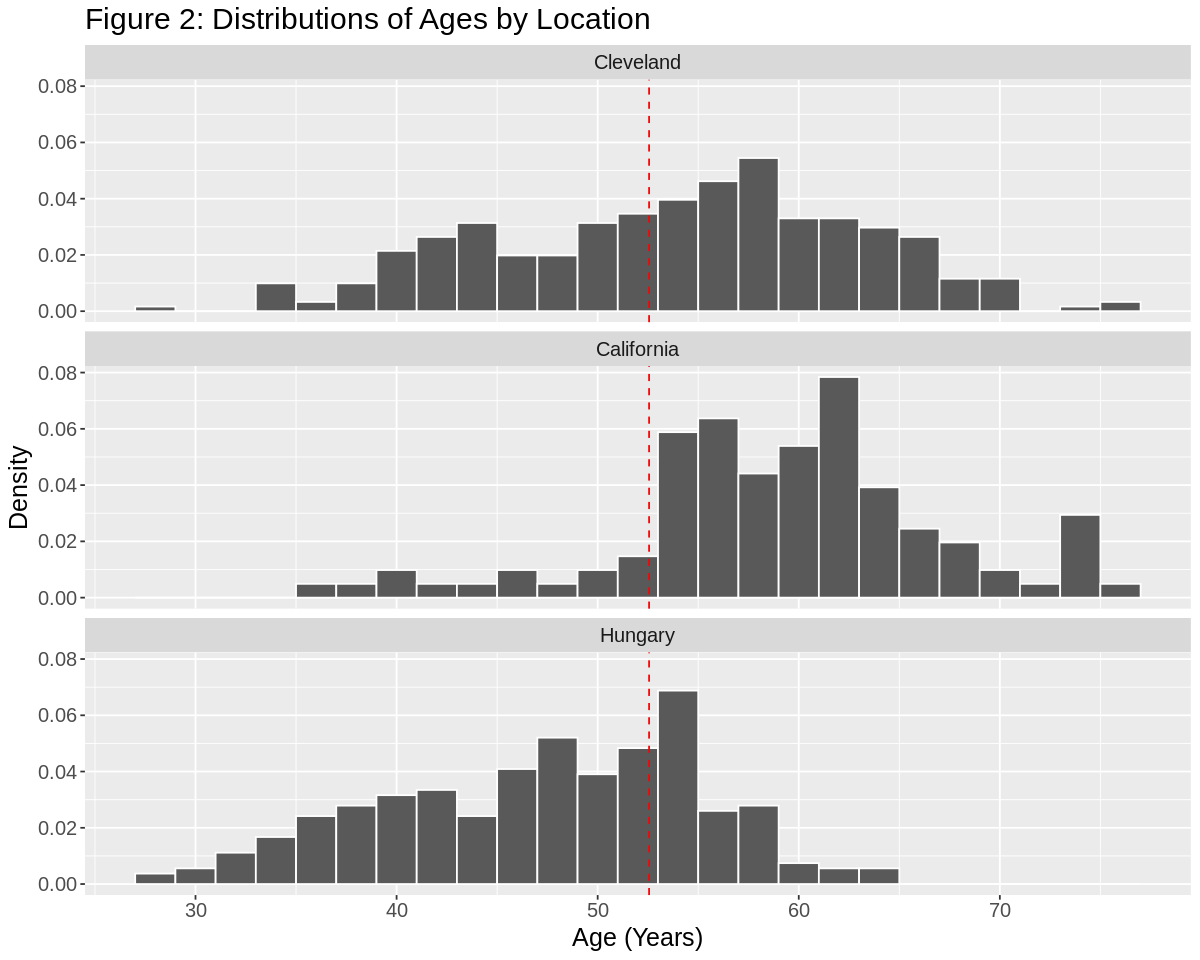

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Distribution of cholesterol levels in each location 
dist_total_chol <- total_heart %>% 
    ggplot() + 
    geom_histogram(aes(x = chol, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "Serum cholesterol level (mg/dl)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) +
    ggtitle("Figure 1: Distributions of Cholesterol Level by Location") + 
    geom_vline(xintercept = mean(total_heart$chol), linetype = "dashed", color = "red") +
    theme(text = element_text(size = 15)) 
dist_total_chol

# Distribution of age in each location 
dist_total_age <- total_heart %>% 
    # filter(sex == 1) %>% 
    ggplot() + 
    geom_histogram(aes(x = age, y = ..density..), color = 'white', binwidth = 2) +
    labs(x = "Age (Years)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) +
    ggtitle("Figure 2: Distributions of Ages by Location") + 
    geom_vline(xintercept = mean(total_heart$age), linetype = "dashed", color = "red") +
    theme(text = element_text(size = 15)) 
dist_total_age

#### 2.3.2. Boxplots of continuous variables
- Boxplots are used to illustrate the distribution and spread of cholesterol levels and ages in each location.
- The ranges and means of `chol` in each location are relatively similar.
- The median `chol` for California is slightly lower compared to the other locations.
- The mean and median `age` for each location apper to be significantly different from each other.

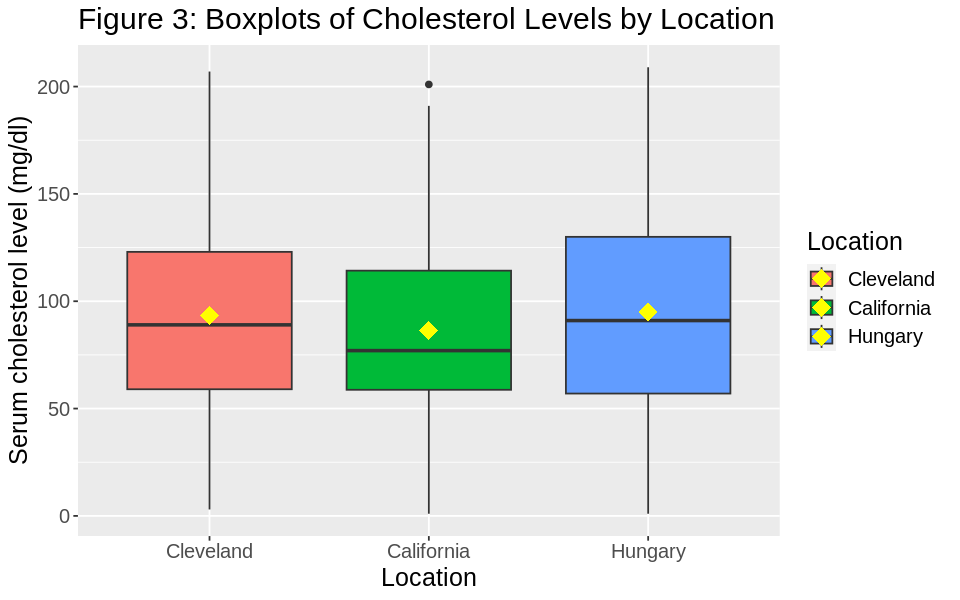

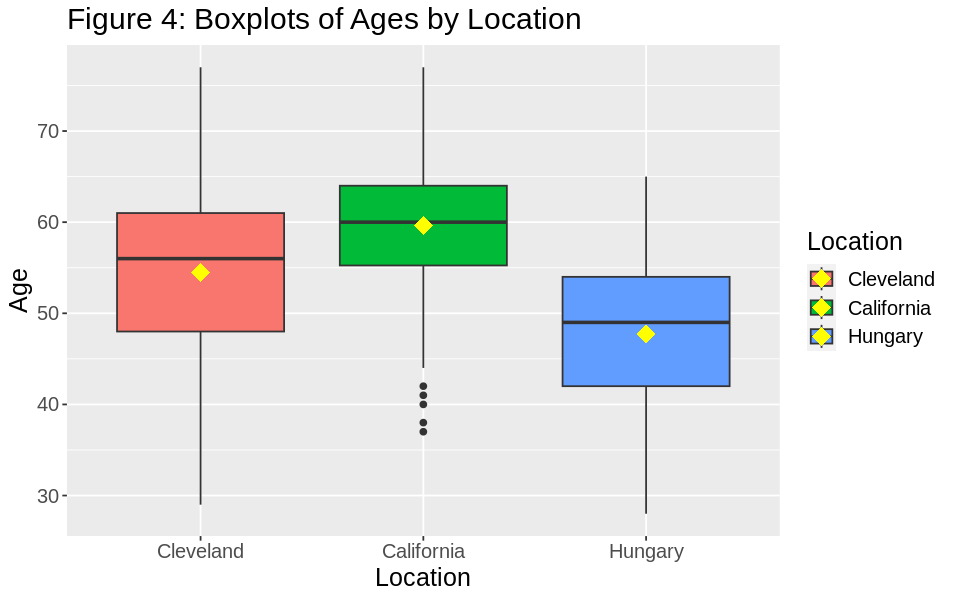

In [6]:
options(repr.plot.width = 8, repr.plot.height = 5)

# Boxplots of Cholesterol Levels by Location
box_total <- total_heart %>% 
    ggplot(aes(x = location, y = chol, fill = location)) + 
    geom_boxplot() + 
    labs(x = "Location", y = "Serum cholesterol level (mg/dl)", fill = "Location") + 
    ggtitle("Figure 3: Boxplots of Cholesterol Levels by Location") +
    theme(text = element_text(size = 15)) + 
    stat_summary(aes(location, chol, fill = location),
        fun = "mean", colour = "yellow", geom = "point",
        shape = 18, size = 5
    )
box_total

# Boxplots of Ages by Location
box_total <- total_heart %>% 
    ggplot(aes(x = location, y = age, fill = location)) + 
    geom_boxplot() + 
    labs(x = "Location", y = "Age", fill = "Location") + 
    ggtitle("Figure 4: Boxplots of Ages by Location") + 
    theme(text = element_text(size = 15)) + 
    stat_summary(aes(location, age, fill = location),
        fun = "mean", colour = "yellow", geom = "point",
        shape = 18, size = 5
    )
box_total

#### 2.3.3. Bar plots of average cholesterol level against age ranges
- Bar plot is used to give an idea of how `age` would affect average `chol`.
- Average `chol` are significantly lower for people of `age` less than 30, and relatively similar for people with `age` of 30 or above.

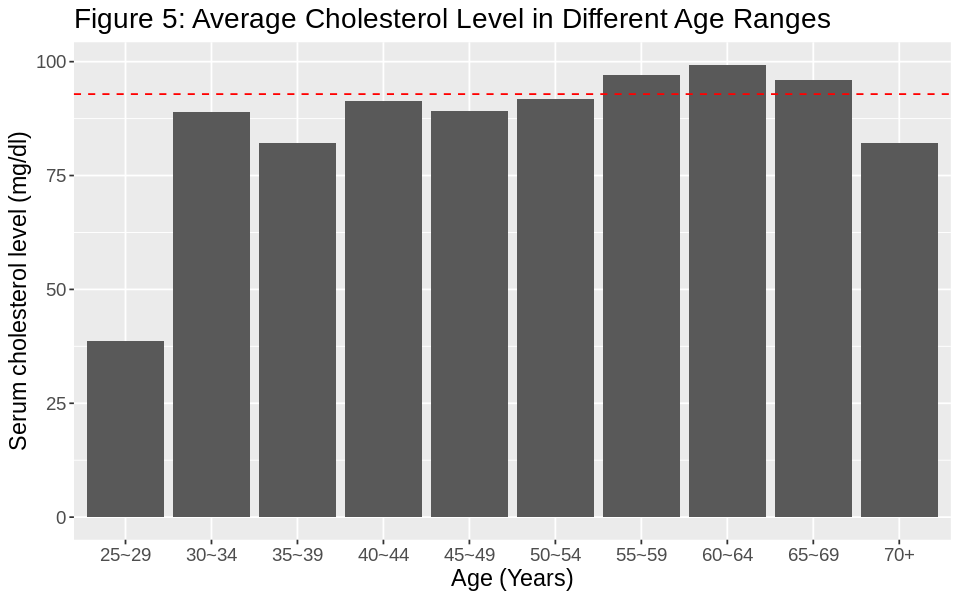

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5)
heart.dat <- total_heart %>%
    group_by(age) %>%
    summarize(chol = mean(chol, na.rm=TRUE))
# heart.dat

heart.col2 <- heart.dat %>%
    filter(age >= 25,age < 30) %>%
    select(chol)
col.val2 <- sum(heart.col2)/nrow(heart.col2)
heart.col3 <- heart.dat %>%
    filter(age >= 30,age < 35) %>%
    select(chol)
col.val3 <- sum(heart.col3)/nrow(heart.col3)
heart.col4 <- heart.dat %>%
    filter(age >= 35,age < 40) %>%
    select(chol)
col.val4 <- sum(heart.col4)/nrow(heart.col4)
heart.col5 <- heart.dat %>%
    filter(age >= 40,age < 45) %>%
    select(chol)
col.val5 <- sum(heart.col5)/nrow(heart.col5)
heart.col6 <- heart.dat %>%
    filter(age >= 45,age < 50) %>%
    select(chol)
col.val6 <- sum(heart.col6)/nrow(heart.col6)
heart.col7 <- heart.dat %>%
    filter(age >= 50,age < 55) %>%
    select(chol)
col.val7 <- sum(heart.col7)/nrow(heart.col7)
heart.col8 <- heart.dat %>%
    filter(age >= 55,age < 60) %>%
    select(chol)
col.val8 <- sum(heart.col8)/nrow(heart.col8)
heart.col9 <- heart.dat %>%
    filter(age >= 60,age < 65) %>%
    select(chol)
col.val9 <- sum(heart.col9)/nrow(heart.col9)
heart.col10 <- heart.dat %>%
    filter(age >= 65,age < 70) %>%
    select(chol)
col.val10 <- sum(heart.col10)/nrow(heart.col10)
heart.col11 <- heart.dat %>%
    filter(age >= 70) %>%
    select(chol)
col.val11 <- sum(heart.col11)/nrow(heart.col11)
heart.name <- c("25~29","30~34","35~39","40~44","45~49","50~54","55~59","60~64","65~69","70+")
heart.plot.data <- data.frame(heart.name,c(col.val2,col.val3,col.val4,col.val5,col.val6,col.val7,col.val8,col.val9,col.val10,col.val11))
colnames(heart.plot.data) <- c("heart.range","chol.avg")

age_chol_bar_plot <- ggplot(heart.plot.data, aes(x = heart.range, y = chol.avg)) +
    geom_bar(stat="identity") +
    ggtitle("Figure 5: Average Cholesterol Level in Different Age Ranges") +
    labs(x = "Age (Years)",y = "Serum cholesterol level (mg/dl)") + 
    geom_hline(yintercept = mean(total_heart$chol), linetype = "dashed", color = "red") +
    # facet_wrap(~location, scales = "fixed", nrow = 3) +
    theme(text = element_text(size = 14))
age_chol_bar_plot

#### 2.3.4. Pair plots of all continous variables
- The correlations between all continuous variables are not particularly large, with the greatest correlation coefficient being between `age` and `trestbps` at 0.231.
- The correlations of `chol` with the other continous variables are not particularly high.

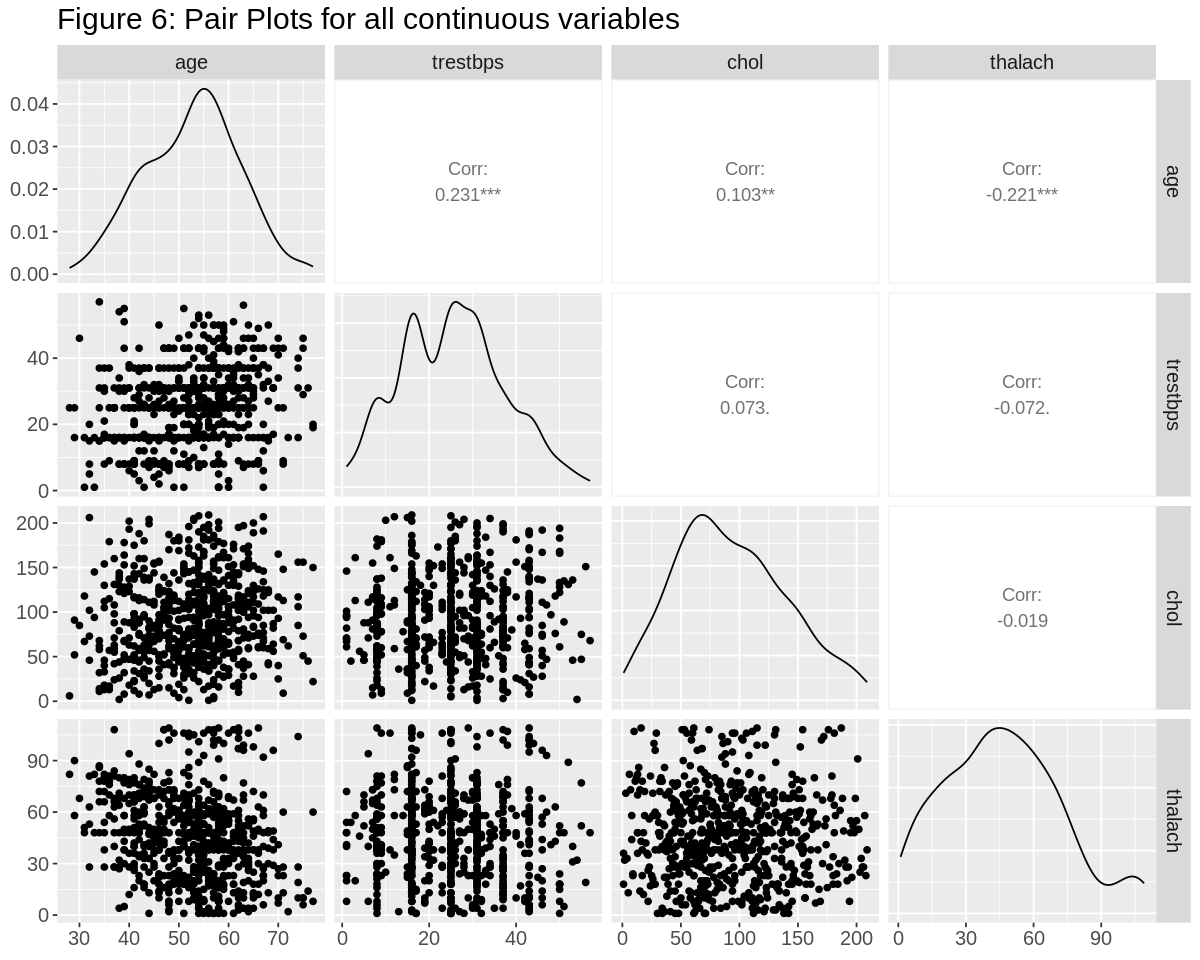

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)

heart_pair_plots <- total_heart %>%
  select(age, trestbps, chol, thalach) %>% 
  ggpairs(progress = FALSE) +
    ggtitle("Figure 6: Pair Plots for all continuous variables") +
  theme(
    text = element_text(size = 15),
    # plot.title = element_text(face = "bold"),
    # axis.title = element_text(face = "bold")
  )
heart_pair_plots

#### 2.3.5. Variance Inflation Factor (VIF) on variables
- VIF for each variable is calculated to test for multicollinearity.
- Horizontal line of VIF = 5 to indicate severe correlation of a variable with other variables.
- Adjusted VIF for all variables are significantly lower than 5, so multicollinearity between all variables is relatively low.

GVIF     Df GVIF..1..2.Df.. variable
location 2.207061 2  1.218859        location
age      1.468909 1  1.211986        age     
sex      1.101483 1  1.049515        sex     
cp       1.514816 3  1.071667        cp      
trestbps 1.094706 1  1.046282        trestbps
chol     1.067328 1  1.033116        chol    
restecg  1.614729 2  1.127262        restecg 
thalach  1.166783 1  1.080177        thalach 
exang    1.440197 1  1.200082        exang

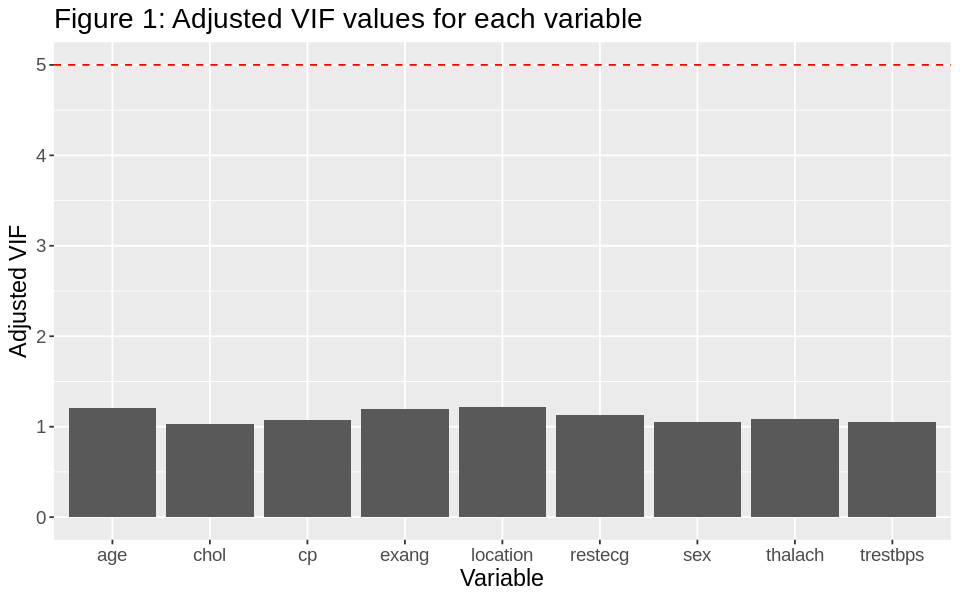

In [9]:
options(repr.plot.width = 8, repr.plot.height = 5)

# total_heart <- total_heart %>% 
#     select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num)
# VIF_prep <- lm(chol ~ ., data = total_heart)
# # vif(VIF_prep)
# heart_MLR_add_inter_VIF <- data.frame(vif(VIF_prep))
# heart_MLR_add_inter_VIF$variable <- c("location", "age", "sex", "cp", "trestbps", "restecg", "thalach", "exang", "num") 
# heart_MLR_add_inter_VIF

total_heart <- total_heart %>% 
    select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num)
VIF_prep <- lm(num ~ ., data = total_heart)
# vif(VIF_prep)
heart_MLR_add_inter_VIF <- data.frame(vif(VIF_prep))
heart_MLR_add_inter_VIF$variable <- c("location", "age", "sex", "cp", "trestbps", "chol", "restecg", "thalach", "exang") 
heart_MLR_add_inter_VIF

# VIF graph
heart_MLR_add_inter_VIF_vis <- ggplot(heart_MLR_add_inter_VIF, aes(x = variable, y = GVIF..1..2.Df..)) +
    geom_bar(stat = "identity") +
    ggtitle("Figure 1: Adjusted VIF values for each variable") +
    labs(x = "Variable",y = "Adjusted VIF") + 
    geom_hline(yintercept = 5, linetype = "dashed", color = "red") +
    theme(text = element_text(size = 14))
heart_MLR_add_inter_VIF_vis

#### 2.3.6. MLR and scatterplot of cholesterol level against age by location
- Additive MLR model with `chol` as response, `age` and `location` as input variables, illustrated on the scatterplot of `chol` against `age`, and with interaction between input variables.
- The slope of the California line is close to 0, while the slope of the Hungary line is slightly lower than that of Cleveland.


Call:
lm(formula = chol ~ age * location, data = total_heart)

Coefficients:
           (Intercept)                     age      locationCalifornia  
               38.9468                  0.9955                 47.3248  
       locationHungary  age:locationCalifornia     age:locationHungary  
               16.1439                 -0.9943                 -0.1583  


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


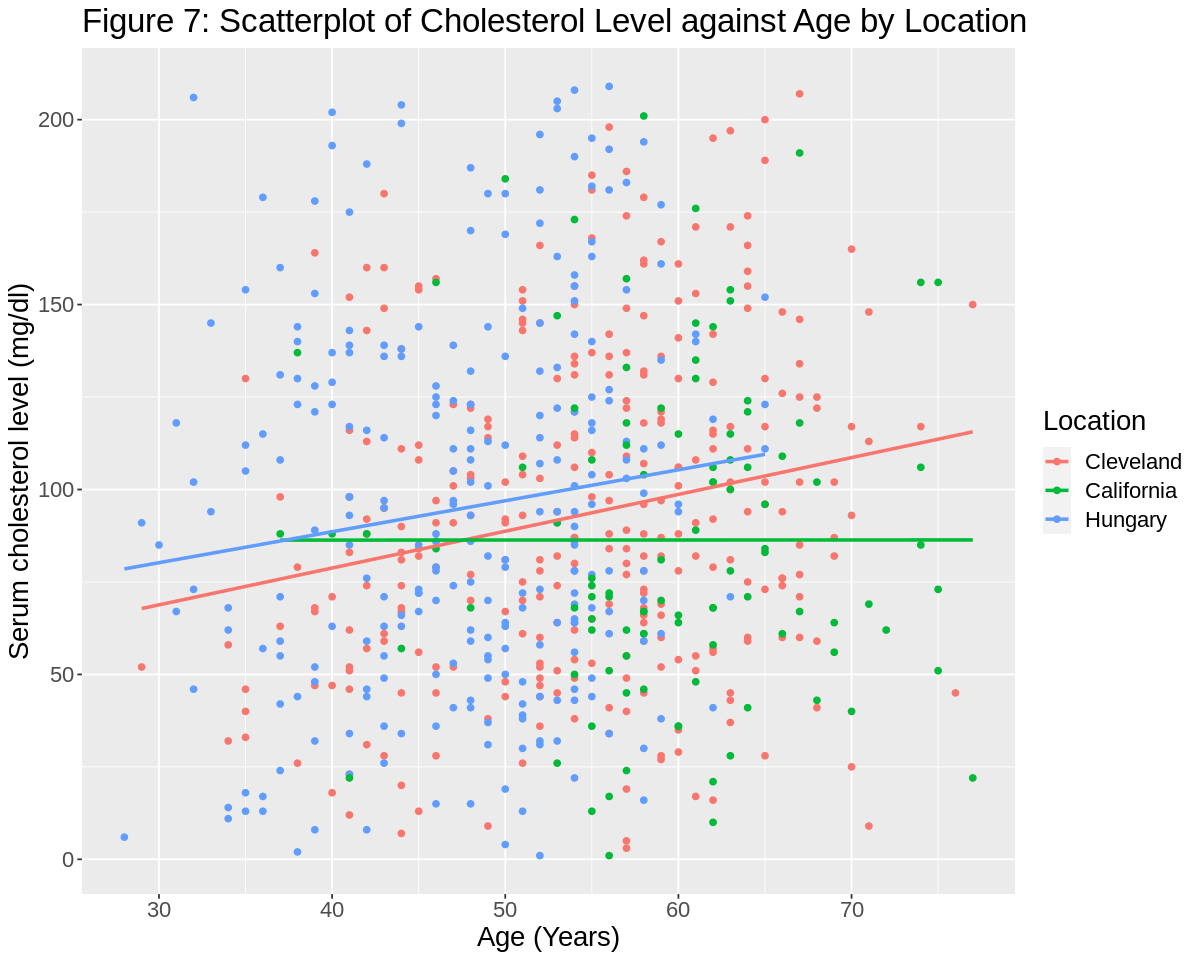

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8)

heart_MLR_chol_age_full <- lm(chol ~ age * location, data = total_heart) 
heart_MLR_chol_age_full

total_heart$pred_MLR_add_inter <- predict(heart_MLR_chol_age_full) # Using predict() to create estimated regression lines.

heart_MLR_chol_age_full_plot <- ggplot(total_heart, aes(
  x = age,
  y = chol,
  color = location
)) +
  geom_point() +
  geom_line(aes(y = pred_MLR_add_inter), size = 1) +
  labs(
    title = "Figure 7: Scatterplot of Cholesterol Level against Age by Location",
    x = "Age (Years)",
    y = "Serum cholesterol level (mg/dl)"
  ) +
  theme(
    text = element_text(size = 16.5),
    # plot.title = element_text(face = "bold"),
    # axis.title = element_text(face = "bold"),
    # legend.title = element_text(face = "bold"),
  ) +
  labs(color = "Location")
heart_MLR_chol_age_full_plot

total_heart <- total_heart[-c(11, 12)]
# head(total_heart)

In [11]:
# corr_matrix_CASchools <- total_heart %>%
#   select(- chol) %>% 
#   cor() %>%
#   as.data.frame() %>%
#   rownames_to_column("var1") %>%
#   pivot_longer(-var1, names_to = "var2", values_to = "corr")
# corr_matrix_CASchools

# plot_corr_matrix_CASchools <- corr_matrix_CASchools %>%
#   ggplot(aes(x = var1, y = var2)) +
#   geom_tile(aes(fill = corr), color = "white") +
#   scale_fill_distiller("Correlation Coefficient \n",
#     palette = "YlOrRd",
#     direction = 1, limits = c(-1, 1)
#   ) +
#   labs(x = "Variable 1", y = "Variable 2") +
#   theme_minimal() +
#   theme(
#     axis.text.x = element_text(
#       angle = 45, vjust = 1,
#       size = 18, hjust = 1
#     ),
#     axis.text.y = element_text(
#       vjust = 1,
#       size = 18, hjust = 1
#     ),
#     legend.title = element_text(size = 18, face = "bold"),
#     legend.text = element_text(size = 18),
#     legend.key.size = unit(2, "cm")
#   ) +
#   coord_fixed() +
#   geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)
# plot_corr_matrix_CASchools

### 3.3. Generative model
- 

In [12]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

total_heart$ID <- rownames(total_heart)
training_heart <- sample_n(total_heart, size = nrow(total_heart) * 0.70,
  replace = FALSE
)

second_set_heart <- anti_join(total_heart,
  training_heart,
  by = "ID"
)

training_heart <- training_heart[,-11]
second_set_heart <- second_set_heart[,-11]

# head(training_heart)
# nrow(training_heart)

# head(second_set_heart)
# nrow(second_set_heart)

heart_backward_sel <- regsubsets(
  x = chol ~ ., # Response variable 
  nvmax = 13, # Number of variables wanted in model 
  data = second_set_heart, # Dataset
  method = "backward", # Method type 
)
heart_backward_sel

heart_bwd_summary <- summary(heart_backward_sel)
heart_bwd_summary

heart_bwd_summary_df <- data.frame(
   n_input_variables = 1:13,
   RSQ = heart_bwd_summary$rsq,
   RSS = heart_bwd_summary$rss,
   ADJ.R2 = heart_bwd_summary$adjr2
)
heart_bwd_summary_df

total_heart <- total_heart[-c(11, 12)]

Subset selection object
Call: regsubsets.formula(x = chol ~ ., nvmax = 13, data = second_set_heart, 
    method = "backward", )
13 Variables  (and intercept)
                   Forced in Forced out
locationCalifornia     FALSE      FALSE
locationHungary        FALSE      FALSE
age                    FALSE      FALSE
sex1                   FALSE      FALSE
cp2                    FALSE      FALSE
cp3                    FALSE      FALSE
cp4                    FALSE      FALSE
trestbps               FALSE      FALSE
restecg1               FALSE      FALSE
restecg2               FALSE      FALSE
thalach                FALSE      FALSE
exang1                 FALSE      FALSE
num1                   FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: backward

Subset selection object
Call: regsubsets.formula(x = chol ~ ., nvmax = 13, data = second_set_heart, 
    method = "backward", )
13 Variables  (and intercept)
                   Forced in Forced out
locationCalifornia     FALSE      FALSE
locationHungary        FALSE      FALSE
age                    FALSE      FALSE
sex1                   FALSE      FALSE
cp2                    FALSE      FALSE
cp3                    FALSE      FALSE
cp4                    FALSE      FALSE
trestbps               FALSE      FALSE
restecg1               FALSE      FALSE
restecg2               FALSE      FALSE
thalach                FALSE      FALSE
exang1                 FALSE      FALSE
num1                   FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: backward
          locationCalifornia locationHungary age sex1 cp2 cp3 cp4 trestbps
1  ( 1 )  " "                " "             " " " "  " " " " " " " "     
2  ( 1 )  " "                " "             " " "*"  " " " " " " " " 

n_input_variables RSQ        RSS      ADJ.R2    
1   1                0.02717392 501965.5 0.02233399
2   2                0.05508024 487566.2 0.04563104
3   3                0.07115468 479272.0 0.05715198
4   4                0.08882575 470154.0 0.07041819
5   5                0.09542412 466749.3 0.07246534
6   6                0.09917557 464813.6 0.07159931
7   7                0.10161160 463556.6 0.06936176
8   8                0.10317784 462748.5 0.06619548
9   9                0.10440550 462115.0 0.06264203
10 10                0.10504218 461786.5 0.05842979
11 11                0.10550705 461546.6 0.05399175
12 12                0.10567359 461460.7 0.04918981
13 13                0.10608740 461247.2 0.04460135

### 2.4. Summary statistics for explanatory and response variables
The data below consists of summary data for the overall population: 
- `total_heart_pop_data`: For each location, the mean (`heart_chol_mean`), standard deviation (`heart_chol_sd`), and median (`heart_chol_median`) of cholesterol level values, mean (`heart_age_mean`), standard deviation (`heart_age_sd`), and median (`heart_age_median`) of ages, and quantity (`n`) of patients are measured.

In [13]:
# Count number of each combination of year and location
countPatients <- total_heart %>% 
    group_by(location) %>%
    tally() 

# Obtaining point estimates for each combination of location and year
total_heart_pop_data <- total_heart %>% 
    # filter(year != 2014) %>% 
    group_by(location) %>% 
    summarize(
        heart_chol_mean = mean(chol), 
        heart_chol_sd = sd(chol), 
        heart_chol_median = median(chol), 
        heart_age_mean = mean(age), 
        heart_age_sd = sd(age), 
        heart_age_median = median(age)
    ) %>% 
    inner_join(countPatients) 
total_heart_pop_data

Joining with `by = join_by(location)`


location   heart_chol_mean heart_chol_sd heart_chol_median heart_age_mean
1 Cleveland  93.14191        44.43490      89                54.43894      
2 California 86.34314        43.69981      77                59.63725      
3 Hungary    95.07063        50.82042      91                47.75093      
  heart_age_sd heart_age_median n  
1 9.038662     56               303
2 7.968737     60               102
3 7.806023     49               269

## 3. Methods and Results

The dataset contains measurements for cholesterol levels in separate locations, and the VIF values for all explanatory variables are relatively low, allowing for potential variations in cholesterol levels due to any non-age variables to be accounted for.

So far, we have examined the difference in slopes of cholesterol level against age between each location. However, we cannot know with our preliminary results if the calculated values are statistically significant. For our results to be more trustworthy, the following have been implemented:

- 

<!-- We anticipate ___. This improvement would be reflected in ___, indicating that ___.

Our study aims to ___. -->

### 3.1. Tidy table
- 
- Using significance level $\alpha = 0.05$, there is sufficient evidence to reject the null hypothesis that the change in `chol` per unit change in `age` in Cleveland is 0.
- Using significance level $\alpha = 0.05$, there is insufficient evidence to reject the null hypothesis that the change in `chol` per unit change in `age` is the same between each location. 

In [14]:
heart_MLR_chol_age_full <- lm(chol ~ age * location, data = total_heart) 

heart_MLR_chol_age_full_results <- tidy(heart_MLR_chol_age_full, conf.int = TRUE, conf.level = 0.95)
heart_MLR_chol_age_full_results

heart_MLR_chol_age_full_gof <- glance(heart_MLR_chol_age_full)
heart_MLR_chol_age_full_gof

heart_MLR_chol_age_full_augment <- augment(heart_MLR_chol_age_full)
head(heart_MLR_chol_age_full_augment)

my_gof <- heart_MLR_chol_age_full_augment %>% 
 summarise(RSS = sum(.resid^2), TSS = (sd(chol))^2*(heart_MLR_chol_age_full_gof$nobs - 1),
           myR2 = 1 - RSS/TSS, my.adjR2 = 1 - (RSS/heart_MLR_chol_age_full_gof$df.residual)/(TSS/(heart_MLR_chol_age_full_gof$nobs - 1)),
           my.sigma = sqrt(RSS/heart_MLR_chol_age_full_gof$df.residual))
head(my_gof)

heart_MLR_full_results <- tidy(lm(chol ~ age * ., data = total_heart) , conf.int = TRUE, conf.level = 0.95)
heart_MLR_full_results

term                   estimate   std.error  statistic  p.value     
1 (Intercept)            38.9467723 16.3417461  2.3832687 0.0174381739
2 age                     0.9955216  0.2961440  3.3616132 0.0008190535
3 locationCalifornia     47.3248023 38.5771547  1.2267572 0.2203460686
4 locationHungary        16.1438724 24.0254893  0.6719477 0.5018493128
5 age:locationCalifornia -0.9943216  0.6519834 -1.5250720 0.1277144388
6 age:locationHungary    -0.1582606  0.4692596 -0.3372560 0.7360298327
  conf.low    conf.high  
1   6.8594005  71.0341441
2   0.4140364   1.5770067
3 -28.4222751 123.0718797
4 -31.0306953  63.3184402
5  -2.2745051   0.2858619
6  -1.0796619   0.7631407

r.squared  adj.r.squared sigma    statistic p.value     df logLik    AIC     
1 0.02795556 0.02067978    46.51688 3.842276  0.001936446 5  -3541.387 7096.773
  BIC      deviance df.residual nobs
1 7128.366 1445432  668         674

chol age location  .fitted   .resid    .hat        .sigma   .cooksd     
1  81  63  Cleveland 101.66463 -20.66463 0.006270897 46.54482 2.088702e-04
2 134  67  Cleveland 105.64672  28.35328 0.009695278 46.53866 6.121487e-04
3  77  67  Cleveland 105.64672 -28.64672 0.009695278 46.53839 6.248847e-04
4  98  37  Cleveland  75.78107  22.21893 0.015626413 46.54366 6.132158e-04
5  52  41  Cleveland  79.76316 -27.76316 0.010620396 46.53919 6.441397e-04
6  84  56  Cleveland  94.69598 -10.69598 0.003399099 46.54989 3.015713e-05
  .std.resid
1 -0.4456389
2  0.6125032
3 -0.6188421
4  0.4814294
5 -0.6000353
6 -0.2303294

RSS     TSS     myR2       my.adjR2   my.sigma
1 1445432 1487002 0.02795556 0.02067978 46.51688

term                   estimate      std.error    statistic   p.value     
1  (Intercept)              2.774261447 59.531198878  0.04660181 0.9628449497
2  age                      1.322274799  1.085811695  1.21777543 0.2237525666
3  locationCalifornia      -4.998696863 42.776382760 -0.11685646 0.9070100053
4  locationHungary         -7.628503696 27.725444341 -0.27514451 0.7832929258
5  sex1                    81.580644268 25.597759934  3.18702279 0.0015065651
6  cp2                     14.218414133 44.562066393  0.31906990 0.7497763317
7  cp3                     16.713840432 44.615674046  0.37461813 0.7080670498
8  cp4                     58.657543325 43.844185495  1.33786368 0.1814101924
9  trestbps                -0.836038146  0.857984866 -0.97442062 0.3302113385
10 restecg1                18.739767137 32.174602349  0.58243974 0.5604731165
11 restecg2               -20.468584297 28.914397567 -0.70790284 0.4792601291
12 thalach                 -0.117638153  0.458200076 -0.25673971 0.7974612095
13 exang1                 -33.059654992 28.359702678 -1.16572643 0.2441539635
14 num1                    22.014848230 29.437432438  0.74785219 0.4548206296
15 age:locationCalifornia   0.028659460  0.743171088  0.03856375 0.9692500854
16 age:locationHungary      0.370542909  0.539588759  0.68671354 0.4925089219
17 age:sex1                -1.799428613  0.485681047 -3.70495951 0.0002294747
18 age:cp2                 -0.029788225  0.833496940 -0.03573885 0.9715015964
19 age:cp3                 -0.259546239  0.819101037 -0.31686718 0.7514464402
20 age:cp4                 -0.871692994  0.804809019 -1.08310540 0.2791644934
21 age:trestbps             0.018134945  0.015989824  1.13415542 0.2571487464
22 age:restecg1            -0.335280407  0.591437792 -0.56689040 0.5709849525
23 age:restecg2             0.568712398  0.522885575  1.08764216 0.2771574847
24 age:thalach              0.004108288  0.008290557  0.49553825 0.6203882328
25 age:exang1               0.744691104  0.517504625  1.43900376 0.1506322959
26 age:num1                -0.249513026  0.542429794 -0.45999137 0.6456767115
   conf.low      conf.high   
1  -114.12308353 119.67160642
2    -0.80985939   3.45440899
3   -88.99575499  78.99836126
4   -62.07106311  46.81405572
5    31.31607325 131.84521528
6   -73.28506885 101.72189712
7   -70.89490823 104.32258910
8   -27.43628602 144.75137267
9    -2.52080436   0.84872807
10  -44.43929966  81.91883393
11  -77.24580987  36.30864127
12   -1.01737431   0.78209801
13  -88.74766413  22.62835415
14  -35.78942516  79.81912162
15   -1.43065479   1.48797371
16   -0.68901065   1.43009646
17   -2.75312728  -0.84572995
18   -1.66646918   1.60689273
19   -1.86795894   1.34886646
20   -2.45204144   0.70865545
21   -0.01326318   0.04953307
22   -1.49664636   0.82608555
23   -0.45804225   1.59546705
24   -0.01217131   0.02038789
25   -0.27149735   1.76087955
26   -1.31464533   0.81561927

### 3.2. Tidy table
- Using significance level $\alpha = 0.05$.
- 1: Fail to reject the null hypothesis; tnot enough evidence that the full model with additional interaction terms is better than the linear model (reduced) model
- 2: Fail to reject the null hypothesis; tnot enough evidence that the full model with additional interaction terms is better than the additive (reduced) model

In [15]:
# heart_MLR_chol_age_null_full <- anova(lm(chol ~ 1, data = total_heart), heart_MLR_chol_age_full)
# heart_MLR_chol_age_null_full

heart_MLR_chol_age_nonadd_full <- anova(lm(chol ~ age, data = total_heart), heart_MLR_chol_age_full)
heart_MLR_chol_age_nonadd_full

heart_MLR_chol_age_add_full <- anova(lm(chol ~ age + location, data = total_heart), heart_MLR_chol_age_full)
heart_MLR_chol_age_add_full 

tidy(lm(chol ~ ., data = total_heart))

Res.Df RSS     Df Sum of Sq F        Pr(>F)   
1 672    1471102 NA       NA        NA        NA
2 668    1445432  4 25670.63  2.965892 0.0190888

Res.Df RSS     Df Sum of Sq F       Pr(>F)   
1 670    1450488 NA       NA       NA        NA
2 668    1445432  2 5056.242  1.16836 0.3115108

term               estimate     std.error   statistic  p.value    
1  (Intercept)         41.40633769 16.20119749  2.5557579 0.010818625
2  locationCalifornia  -8.55981213  6.25808700 -1.3678001 0.171840187
3  locationHungary     11.58757956  4.82665161  2.4007491 0.016637330
4  age                  0.59903342  0.22716639  2.6369809 0.008561639
5  sex1               -12.36530745  4.30100168 -2.8749832 0.004170643
6  cp2                 11.10207885  8.68627323  1.2781176 0.201657273
7  cp3                  3.27181475  8.57496902  0.3815541 0.702914926
8  cp4                 12.60824989  8.41770858  1.4978245 0.134656953
9  trestbps             0.13992568  0.15778784  0.8867963 0.375511587
10 restecg1            -1.85566600  5.60480476 -0.3310849 0.740685475
11 restecg2             9.93575523  4.78851897  2.0749119 0.038381602
12 thalach              0.09197365  0.07459981  1.2328939 0.218054291
13 exang1               5.99183550  4.55086240  1.3166374 0.188417214
14 num1                 8.49871979  4.67055800  1.8196369 0.069267207

### 3.3. Bootstrap Sampling Distribution vs Central Limit Theorem (CLT) for slope in each location 
- Bootstrap sampling distribution of slopes is obtained using the `infer` package.
    - The original sample is used as an estimate of the overall population. 
    - Bootstrap samples are created by sampling from the original sample with replacement.
        - Each bootstrap sample is equal to the original sample size.
    - Bootstrapping is repeated 1000 times to obtain 1000 separate bootstrap samples. 
    - The point estimate (Slope) is calculated for each replicated bootstrap sample to obtain a bootstrap sampling distribution of the estimate.
- 95% confidence interval of slope by bootstrapping is obtained using `get_confidence_interval()`.
- `shade_confidence_interval()` is used on the plot to visualise the 95% confidence interval of differences in means.
- `ggplot` is used to visualise `CLE_boot_diff_in_means`, along with `CLE_clt_samp_dist` and `CLE_boot_diff_in_means_ci`.
- The steps above are applied separately for each location.

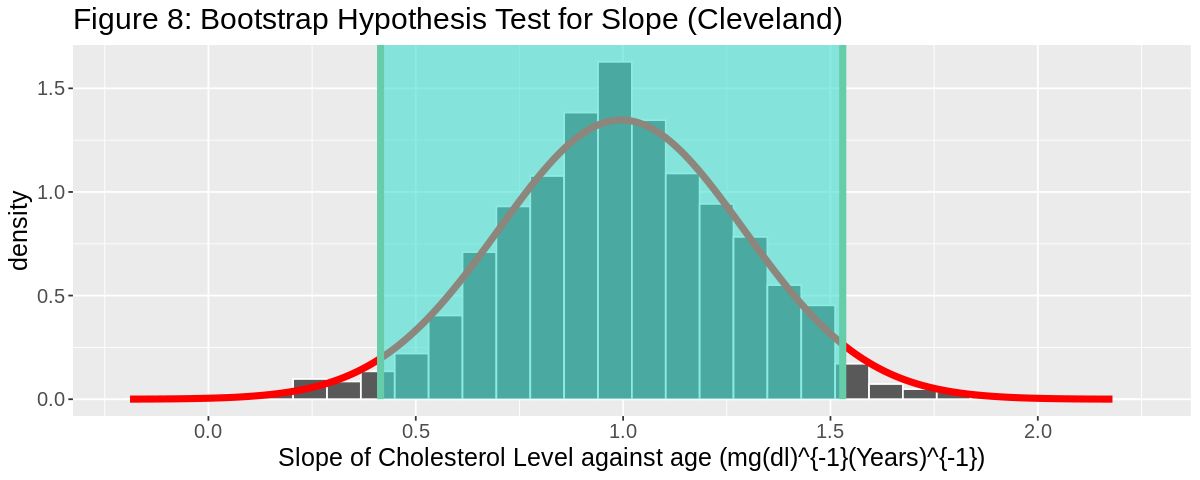

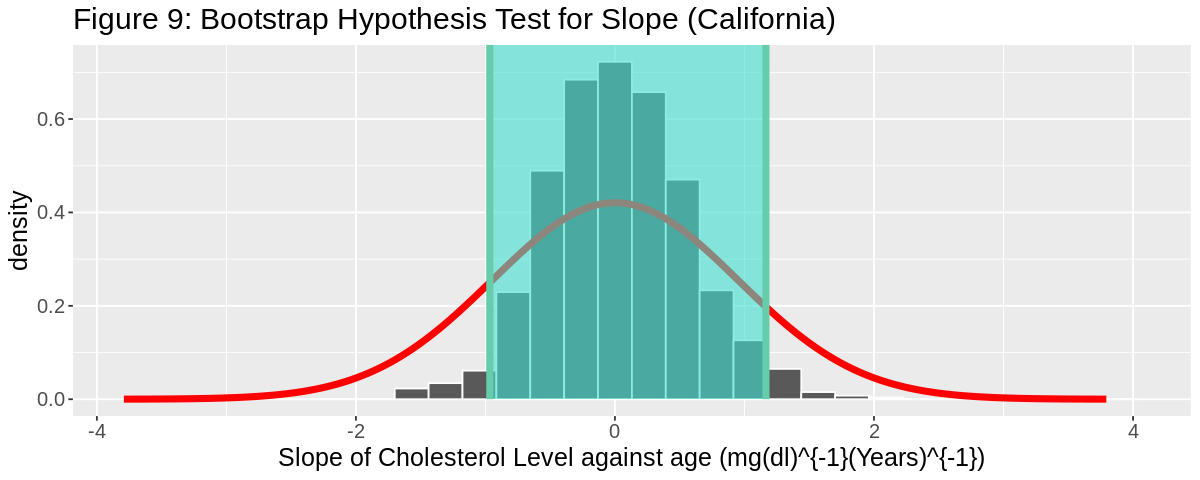

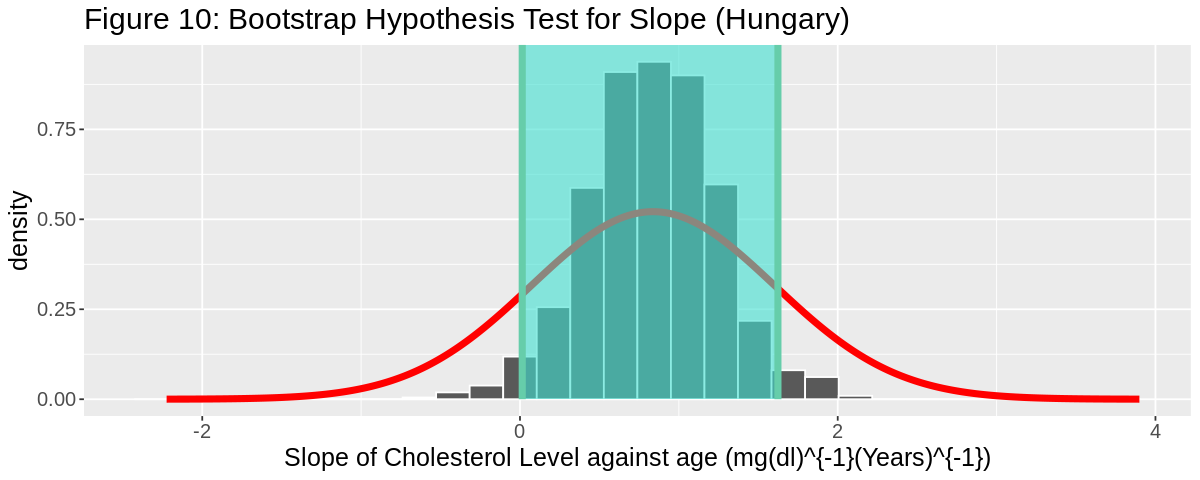

In [16]:
options(repr.plot.width = 10, repr.plot.height = 4)
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# _________________________________________________
## CLEVELAND 
# Bootstrap samples for slope
CLE_boot_diff_in_means <- total_heart %>% 
    filter(location == "Cleveland") %>% 
    specify(formula = chol ~ age) %>%
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "slope")
# heart_MLR_chol_age_full_results$estimate[1]
# Normal distribution
CLE_clt_samp_dist <- 
    tibble(
        x = seq(heart_MLR_chol_age_full_results$estimate[2] - 4 * heart_MLR_chol_age_full_results$std.error[2], 
                heart_MLR_chol_age_full_results$estimate[2] + 4 * heart_MLR_chol_age_full_results$std.error[2], 0.0001),
        density = dnorm(x, heart_MLR_chol_age_full_results$estimate[2], heart_MLR_chol_age_full_results$std.error[2])
    )

# 95% confidence interval obtained from bootstrap samples 
CLE_boot_diff_in_means_ci <- CLE_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
CLE_boot_diff_in_means_plot <- CLE_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    # shade_p_value(obs_stat = CLE_obs_diff_in_means, direction = "greater") + 
    ggtitle("Figure 8: Bootstrap Hypothesis Test for Slope (Cleveland)") + 
    xlab("Slope of Cholesterol Level against age (mg(dl)^{-1}(Years)^{-1})") + 
    geom_line(data = CLE_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = CLE_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15)) 
# +
#     scale_x_continuous(limits = c(-2, 2), breaks = seq(-2, 2, by = 0.5)) + 
#     scale_y_continuous(limits = c(0, 1.5), breaks = seq(0, 1.5, by = 0.25))
CLE_boot_diff_in_means_plot

# _________________________________________________
## CALIFORNIA 
# Bootstrap samples for slope
CAL_boot_diff_in_means <- total_heart %>% 
    filter(location == "California") %>% 
    specify(formula = chol ~ age) %>%
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "slope")

# # Normal distribution
CAL_clt_samp_dist <- 
    tibble(
        x = seq((heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[5]) - 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[5]), 
                (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[5]) + 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[5]), 0.0001),
        density = dnorm(x, (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[5]), (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[5]))
    )

# 95% confidence interval obtained from bootstrap samples 
CAL_boot_diff_in_means_ci <- CAL_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
CAL_boot_diff_in_means_plot <- CAL_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    # shade_p_value(obs_stat = CAL_obs_diff_in_means, direction = "greater") + 
    ggtitle("Figure 9: Bootstrap Hypothesis Test for Slope (California)") + 
    xlab("Slope of Cholesterol Level against age (mg(dl)^{-1}(Years)^{-1})") + 
    geom_line(data = CAL_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = CAL_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15)) 
# +
#     scale_x_continuous(limits = c(-2, 2), breaks = seq(-2, 2, by = 0.5)) + 
#     scale_y_continuous(limits = c(0, 1.5), breaks = seq(0, 1.5, by = 0.25))
CAL_boot_diff_in_means_plot

# _________________________________________________
## HUNGARY 
# Bootstrap samples for slope
HUN_boot_diff_in_means <- total_heart %>% 
    filter(location == "Hungary") %>% 
    specify(formula = chol ~ age) %>%
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "slope")

# Normal distribution
HUN_clt_samp_dist <- 
    tibble(
        x = seq((heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[6]) - 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[6]), 
                (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[6]) + 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[6]), 0.0001),
        density = dnorm(x, (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[6]), (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[6]))
    )

# 95% confidence interval obtained from bootstrap samples 
HUN_boot_diff_in_means_ci <- HUN_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
HUN_boot_diff_in_means_plot <- HUN_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    # shade_p_value(obs_stat = HUN_obs_diff_in_means, direction = "greater") + 
    ggtitle("Figure 10: Bootstrap Hypothesis Test for Slope (Hungary)") + 
    xlab("Slope of Cholesterol Level against age (mg(dl)^{-1}(Years)^{-1})") + 
    geom_line(data = HUN_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = HUN_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15)) 
# +
#     scale_x_continuous(limits = c(-2, 2), breaks = seq(-2, 2, by = 0.5)) + 
#     scale_y_continuous(limits = c(0, 1.5), breaks = seq(0, 1.5, by = 0.25))
HUN_boot_diff_in_means_plot

### 3.4. Confidence intervals based on bootstrapping and CLT
- The CLT states that if the sample size $n$ is sufficiently large, the sampling distribution will be approximately normally distributed, even if the underlying distribution of individual observations in the population is not normally distributed. 
- The 95% CLT confidence interval is chosen over bootstrapping, as the parameter we are investigating is the slope of cholesterol level against age, and each individual sample size is greater than 100.
- Since the variance of the normal distribution is unknown, we will need to estimate it. This will be accounted for by having the sampling distribution of mean differences follow a t-distribution with $n - 1$ degrees of freedom.

In [17]:
total_boot_diff_in_means_ci <- dplyr::bind_rows(
    CLE_boot_diff_in_means_ci, 
    CAL_boot_diff_in_means_ci, 
    HUN_boot_diff_in_means_ci
) %>% 
    mutate(location = c("Cleveland", "California", "Hungary")) %>% 
    rename(
        lower_ci_boot = lower_ci, 
        upper_ci_boot = upper_ci
    ) %>% 
    select(location, lower_ci_boot, upper_ci_boot)
total_boot_diff_in_means_ci

# total_clt_diff_in_means_ci <- tibble(
#     location = c("Cleveland", "California", "Hungary"), 
#     lower_ci_clt = total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[c(1, 2, 3, 4, 5)] - qnorm(0.975) * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[c(1, 2, 3, 4, 5)],
#     upper_ci_clt = total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[c(1, 2, 3, 4, 5)] + qnorm(0.975) * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[c(1, 2, 3, 4, 5)]
# )
# total_clt_diff_in_means_ci

# total_diff_in_means_ci <- list(
#     total_boot_diff_in_means_ci, 
#     total_clt_diff_in_means_ci
# ) %>% 
#     reduce(full_join, by = "location") 
# total_diff_in_means_ci

location   lower_ci_boot upper_ci_boot
1 Cleveland   0.41510006   1.529618     
2 California -0.96608362   1.165688     
3 Hungary     0.01413517   1.623636

### 3.5. Regularised regression model
- Ridge regression is used to select and train models for the prediction of `chol`.
- Due to numerous medical studies indicating a strong association between multiple  variables (e.g. Age and heart rate), all variables may influence the result, and thus Ridge regression is used.

In [18]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Splitting of data 
total_heart_split <- initial_split(total_heart, prop = 0.6, strata = chol)
training_total_heart <- training(total_heart_split)
testing_total_heart <- testing(total_heart_split)

In [19]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Creation of matrices
total_heart_X_train <- as.matrix(training_total_heart[,-6])
total_heart_Y_train <- as.matrix(training_total_heart[,6])
head(total_heart_X_train)

total_heart_X_test <- as.matrix(testing_total_heart[,-6])
total_heart_Y_test <- as.matrix(testing_total_heart[,6])

location  age sex cp trestbps restecg thalach exang num
[1,] Cleveland 60  1   4  25       2        30     1     1  
[2,] Cleveland 40  1   4   8       2        12     1     1  
[3,] Cleveland 43  1   4  16       2        18     1     1  
[4,] Cleveland 51  1   3   8       0        21     0     0  
[5,] Cleveland 53  1   3  25       2        50     0     0  
[6,] Cleveland 41  0   2   5       0        66     0     0

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co


Call:  cv.glmnet(x = total_heart_X_train, y = total_heart_Y_train, lambda = exp(seq(-1,      4, 0.05)), alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  29.96    13    2062 100.7       8
1se  54.60     1    2064 102.2       8

NULL

[1] 3.4

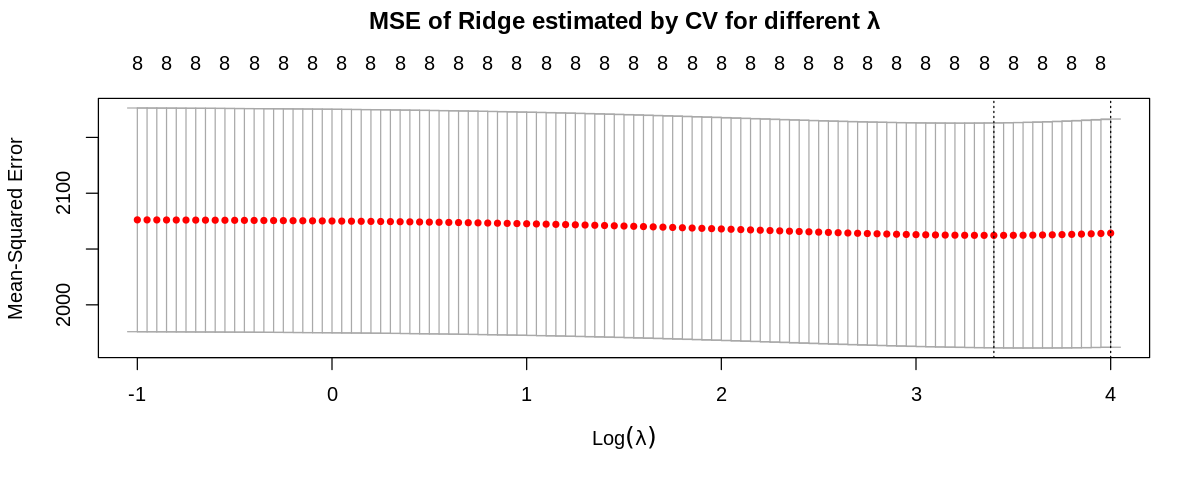

In [23]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Cross validation to select smallest lambda 
total_heart_cv_lambda_ridge <- cv.glmnet(
  x = total_heart_X_train, y = total_heart_Y_train,
  alpha = 0,
  lambda = exp(seq(-1, 4, 0.05))
)

total_heart_cv_lambda_ridge_plot <- plot(total_heart_cv_lambda_ridge, main = "MSE of Ridge estimated by CV for different λ\n\n") 
total_heart_cv_lambda_ridge_plot
log(total_heart_cv_lambda_ridge$lambda.min)

In [24]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Comparing the estimated regression coefficients of ridge regression model with full model
total_heart_reg_coef <- cbind(
    Full_OLS = coef(lm(chol ~ ., data = training_total_heart)), 
    Ridge_min = as.vector(coef(total_heart_cv_lambda_ridge, s = total_heart_cv_lambda_ridge$lambda.min))
) %>% 
    as.data.frame()
total_heart_reg_coef

# 
fat_R_MSE_models <- rbind(
    tibble(
        Model = "OLS Full Regression",
        R_MSE = rmse(
            preds = predict(lm(chol ~ ., data = training_total_heart), newdata = testing_total_heart),
            actuals = testing_total_heart$chol
        )
    ),
    tibble(
        Model = "Ridge Regression with minimum MSE",
        R_MSE = rmse(
            preds = predict(total_heart_cv_lambda_ridge, newx = total_heart_X_test, s = total_heart_cv_lambda_ridge$lambda.min),
            actuals = testing_total_heart$chol
        )
    )
)
fat_R_MSE_models

Warning message in cbind(Full_OLS = coef(lm(chol ~ ., data = training_total_heart)), :
“number of rows of result is not a multiple of vector length (arg 2)”


Full_OLS     Ridge_min  
(Intercept)         49.98891361 76.59567536
locationCalifornia -11.56248143  0.00000000
locationHungary      6.57273087  0.13818241
age                  0.44965521 -7.65682647
sex1               -11.55082529  1.84811506
cp2                 12.99946568  0.14968346
cp3                 -0.45817615  0.54730266
cp4                 15.58537738  0.00237759
trestbps             0.23910733  4.41857925
restecg1            -1.43524377  4.69599925
restecg2             5.30351823 76.59567536
thalach              0.03715618  0.00000000
exang1               5.47440093  0.13818241
num1                 7.83285392 -7.65682647

Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”


Model                             R_MSE   
1 OLS Full Regression               47.56003
2 Ridge Regression with minimum MSE 47.95361

In [22]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

coef(total_heart_cv_lambda_ridge, s = total_heart_cv_lambda_ridge$lambda.min)

10 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 76.59567536
location     .         
age          0.13818241
sex         -7.65682647
cp           1.84811506
trestbps     0.14968346
restecg      0.54730266
thalach      0.00237759
exang        4.41857925
num          4.69599925

## References
- Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1988, June 30). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9
- Beckett, N., Nunes, M., & Bulpitt, C. (2000). Is it advantageous to lower cholesterol in the elderly hypertensive?. Cardiovascular drugs and therapy, 14(4), 397–405. https://doi.org/10.1023/a:1007812232328
- Wannamethee, G., & Shaper, A. G. (1994). The association between heart rate and blood pressure, blood lipids and other cardiovascular risk factors. Journal of cardiovascular risk, 1(3), 223–230. https://doi.org/10.1177/174182679400100307
- Sakurai, M., Stamler, J., Miura, K., Brown, I. J., Nakagawa, H., Elliott, P., Ueshima, H., Chan, Q., Tzoulaki, I., Dyer, A. R., Okayama, A., Zhao, L., & INTERMAP Research Group (2011). Relationship of dietary cholesterol to blood pressure: the INTERMAP study. Journal of hypertension, 29(2), 222–228. https://doi.org/10.1097/HJH.0b013e32834069a5